# Introduction
COVID-19 (SARS Cov-2) is a virus that targets the respiratory tract of vulnerable patients. According to WHO, this is the 14th worldwide pandemic and due to the nature of how global the world is today, this pandemic has been the most spread out in terms of infections with almost the entire world suffering. The pandemic has brought about huge economic worries for nations and even more so for the daily wage workers who are without any work now and need to depend upon goverment subsidies. As the world has globalised further in today's times more than ever, the virus has successfully spread in all the habitable continents worlwide. 

The pandemic as brought about unprecedented problems for working class as well as the middle class people who have sadly lost their livelihoods as well due to the accompanied global recession occuring as a result of multiple lockdowns in many countries. COVID-19 (SARS Cov-2) is a virus that targets the respiratory tract of vulnerable patients. According to WHO, this is the 14th worldwide pandemic and due to the nature of how global the world is today, this pandemic has been the most spread out in terms of infections with almost the entire world suffering. The pandemic has brought about huge economic worries for nations and even more so for the daily wage workers who are without any work now and need to depend upon goverment subsidies.

With respect to the nature of virus, it keeps cosntantly mutating hence, making the job of the virologists extremely challenging to come up with a virus. This ailment has also brough about a great deal of an opportunity for budding data sceince emthisiasts such as myself to understand how the virus has spread in India. Through this kernel, I would like to find a few insights such. 

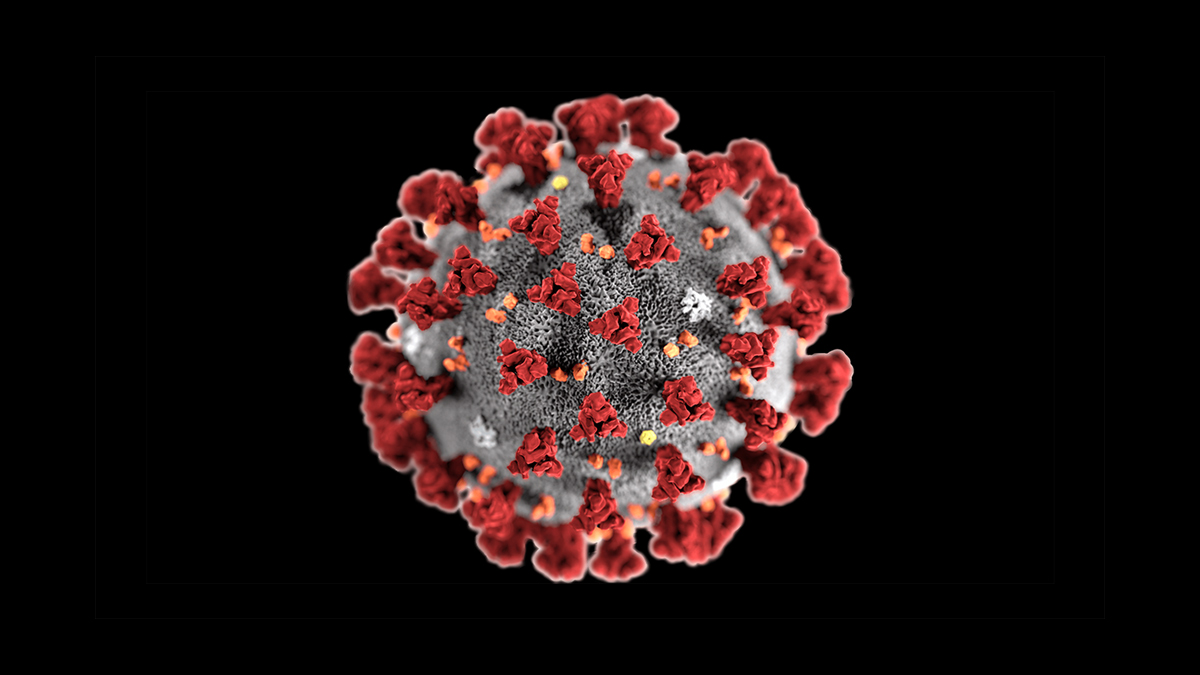

# Importing relevant libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly
import plotly.offline as pyo
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pyo.init_notebook_mode()

In [ ]:
df= pd.read_csv('../input/india-covid19-datajanuary-to-september/India COVID-19.csv')
df.head()

As we can see from the dataframe above, the data concerns with only the cases from India. Hence, we shall try to gain various insights of how India has fought the virus until today.

# Data Pre-processing

Let us check how clean the data is and pre-process it as much as possible for the data visualisations.

In [ ]:
df.isna().any()

As we can see, there are no missing values in the dataframe. We can safely drop the "Unnamed: 0" column as it has no purpose in our analysis.

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

 Let us now check the data types of each column.

In [ ]:
df.info()

We see that the only issue remianing is that of the data type of the date column. Let us convert the object column into date timestamps.

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

Now that we have successfully pre-processed all the data, we can go ahead with the data visualisations.

# Data Visualisation

## a) Rise in confirmed cases

In [ ]:
fig1=px.area(df,y=df['Confirmed'],x=df['Date'],labels={'Confirmed':'Confirmed cases'},color_discrete_sequence=['orange'])
fig1.update_layout(title='Rise in confirmed cases',title_x=0.5,template='plotly_dark')
fig1.show()

As we can see, the rise in number of confirmed cases has been rising ever since May 2020 at an exponential rate. Towards end of Aug 2020, the rise in cases looks to be more linear now. As of 1st October 2020, the number of confirmed cases has touched **6 million (or 60 lakhs).**

## b) Month wise case load

It is important to note the case load for each of the month so that the necessary arrangements in terms of hospital beds, ICUs, PPEs etc. can be forecasted for the essential workers and patients. 

In [ ]:
df['Month']=df['Date'].dt.month

In [ ]:
df['Month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep'},inplace=True)


In [ ]:
df_month=df.groupby('Month')['Confirmed'].max().reset_index().sort_values(by='Confirmed')
df_month['Actual cases']=df_month['Confirmed'].diff(1)
df_month['Actual cases'].fillna(1,inplace=True)

In [ ]:
fig2=px.bar(df_month,x='Month',y='Actual cases',color='Month',labels={'Actual cases':'Confirmed cases'})
fig2.update_layout(template='plotly_dark',title='Monthly case loads since first case',title_x=0.5)
fig2.show()

As we can see, number of cases each month has increased steadily. The month of September has seen an influx of 2.3 million (or 23 lakh) cases

## c) Day wise case load

Let us check which days of the week have shown high case loads.

In [ ]:
df['Day']=df['Date'].dt.dayofweek
df['Day']=df['Day'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [ ]:
df_day=df.groupby('Day')['Confirmed'].max().reset_index().sort_values(by='Confirmed')

In [ ]:
df_day['Actual confirmed']=df_day['Confirmed'].diff(1)

In [ ]:
df_day['Actual confirmed'].fillna(75083,inplace=True)
df_day.replace({0:89000},inplace=True)

In [ ]:
fig3=px.line(df_day,x='Day',y='Actual confirmed',labels={'Confirmed':'Confirmed cases'})
fig3.update_layout(title='Day wise case load',title_x=0.5,template='plotly_dark')
fig3.update_traces(line_color='#AAF0D1')
fig3.show()

As we can see, there is a gradual rise in number of cases with each passing day of the week. Mondays show the least. Although the above graph is based on the last week of September, the general trend has been the same for all weeks so far.

## d) Rise in recoveries

Let us check the rise in recoveries now. This would give us an idea on how many people have recovered successfully from the virus.

In [ ]:
fig4=px.area(df,y=df['Recovered'],x=df['Date'],labels={'Confirmed':'Confirmed cases'},color_discrete_sequence=['blue'])
fig4.update_layout(title='Rise in recovered cases',title_x=0.5,template='plotly_dark')
fig4.show()

As we can see, the number of recoveries have equally risen exponentially post june, 2020. This is an encouraging statistic as it means people are safely recovering without much issues. As of today, the total recovered cases have touched nearly 5 million (or 50 lakhs). 

## e) Death rate

Let us check the rate of increase in death rate as a result of the virus. 

In [ ]:
fig5=px.area(df,y=df['Deaths'],x=df['Date'],labels={'Confirmed':'Confirmed cases'},color_discrete_sequence=['red'])
fig5.update_layout(title='Rise in fatal cases',title_x=0.5,template='plotly_dark')
fig5.show()

As we can see, the number of fatal cases have also risen over the course of the pandemic. As of today, about 1 lakh deaths have been registered. 

For a better visualisation, let us check the curves on over the other to understand how the pandemic has unfolded in India.

## f) Combined curves

In [ ]:
fig6=go.Figure()

fig6.add_trace(go.Scatter(name='Confirmed cases',x=df['Date'], y=df['Confirmed'], fill='tozeroy',
                    mode='none',fillcolor='blue' 
                    ))

fig6.add_trace(go.Scatter(name='Recovered cases',x=df['Date'], y=df['Recovered'], fill='tozeroy',
                    mode='none',fillcolor='green'
                    ))

fig6.add_trace(go.Scatter(name='Deaths',x=df['Date'], y=df['Deaths'], fill='tozeroy',
                    mode='none',fillcolor='red'
                    ))

fig6.update_layout(title='COVID-19 spread in India',title_x=0.5,template='plotly_dark')
fig6.show()

As we can see, the cases have still rampantly increases with no signs of curve flattening anytime soon. However, recent indicators have shown that there has been negative growth of cases recently which is definitely a step in the right direction.

# If you found this notebook useful, an upvote would be great ! :)